We will use the daily spreadsheet from EU CDC containing new cases and deaths per country per day.

In [1]:
!wget -N https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide.xlsx

--2020-06-04 11:38:22--  https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide.xlsx
Resolving www.ecdc.europa.eu (www.ecdc.europa.eu)... 2600:9000:21c7:7a00:1d:d83a:40c0:93a1, 2600:9000:21c7:ec00:1d:d83a:40c0:93a1, 2600:9000:21c7:6600:1d:d83a:40c0:93a1, ...
Connecting to www.ecdc.europa.eu (www.ecdc.europa.eu)|2600:9000:21c7:7a00:1d:d83a:40c0:93a1|:443... connected.
HTTP request sent, awaiting response... 304 Not Modified
File ‘COVID-19-geographic-disbtribution-worldwide.xlsx’ not modified on server. Omitting download.



Get Pandas and NumPy for feature engineering and calculations and get plots inline.

In [2]:
import pandas as pd
import numpy  as np

%matplotlib inline

We read our dataframe directly from the downloaded Excel file and have a look at the first 10 lines for format. Data for Namibia caused missing values because the `geoId` is __NA__, so we disable interpretation of missing values.

In [3]:
df = pd.read_excel('COVID-19-geographic-disbtribution-worldwide.xlsx', keep_default_na=False, na_values='')
df.head(10)

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,continentExp
0,2020-06-04,4,6,2020,758,24,Afghanistan,AF,AFG,37172386.0,Asia
1,2020-06-03,3,6,2020,759,5,Afghanistan,AF,AFG,37172386.0,Asia
2,2020-06-02,2,6,2020,545,8,Afghanistan,AF,AFG,37172386.0,Asia
3,2020-06-01,1,6,2020,680,8,Afghanistan,AF,AFG,37172386.0,Asia
4,2020-05-31,31,5,2020,866,3,Afghanistan,AF,AFG,37172386.0,Asia
5,2020-05-30,30,5,2020,623,11,Afghanistan,AF,AFG,37172386.0,Asia
6,2020-05-29,29,5,2020,580,8,Afghanistan,AF,AFG,37172386.0,Asia
7,2020-05-28,28,5,2020,625,7,Afghanistan,AF,AFG,37172386.0,Asia
8,2020-05-27,27,5,2020,658,1,Afghanistan,AF,AFG,37172386.0,Asia
9,2020-05-26,26,5,2020,591,1,Afghanistan,AF,AFG,37172386.0,Asia


Last check of our source dataframe.

In [4]:
df.count()

dateRep                    21338
day                        21338
month                      21338
year                       21338
cases                      21338
deaths                     21338
countriesAndTerritories    21338
geoId                      21338
countryterritoryCode       21102
popData2018                21027
continentExp               21338
dtype: int64

We pivot to a country by column format.

In [5]:
df_geo = df.pivot(index='dateRep', columns='geoId', values=['cases', 'deaths'])
df_geo

cases                                                         ...  \
geoId         AD     AE     AF   AG   AI    AL     AM   AO     AR    AT  ...   
dateRep                                                                  ...   
2019-12-31   NaN    0.0    0.0  NaN  NaN   NaN    0.0  NaN    NaN   0.0  ...   
2020-01-01   NaN    0.0    0.0  NaN  NaN   NaN    0.0  NaN    NaN   0.0  ...   
2020-01-02   NaN    0.0    0.0  NaN  NaN   NaN    0.0  NaN    NaN   0.0  ...   
2020-01-03   NaN    0.0    0.0  NaN  NaN   NaN    0.0  NaN    NaN   0.0  ...   
2020-01-04   NaN    0.0    0.0  NaN  NaN   NaN    0.0  NaN    NaN   0.0  ...   
...          ...    ...    ...  ...  ...   ...    ...  ...    ...   ...  ...   
2020-05-31   0.0  726.0  866.0  0.0  0.0  23.0  251.0  7.0  795.0  44.0  ...   
2020-06-01   0.0  661.0  680.0  0.0  0.0  15.0  355.0  2.0  637.0   4.0  ...   
2020-06-02   1.0  635.0  545.0  0.0  0.0   6.0  210.0  0.0  564.0  21.0  ...   
2020-06-03  79.0  596.0  759.0  0.0  0.0  21.0  517.0  0.0  904.0  11.0  ...   
2020-06-04   7.0  571.0  758.0  1.0  0.0  20.0  515.0  0.0  949.0  31.0  ...   

           deaths                                                 
geoId          VC   VE   VG   VI   VN   XK    YE    ZA   ZM   ZW  
dateRep                                                           
2019-12-31    NaN  NaN  NaN  NaN  0.0  NaN   NaN   NaN  NaN  NaN  
2020-01-01    NaN  NaN  NaN  NaN  0.0  NaN   NaN   NaN  NaN  NaN  
2020-01-02    NaN  NaN  NaN  NaN  0.0  NaN   NaN   NaN  NaN  NaN  
2020-01-03    NaN  NaN  NaN  NaN  0.0  NaN   NaN   NaN  NaN  NaN  
2020-01-04    NaN  NaN  NaN  NaN  0.0  NaN   NaN   NaN  NaN  NaN  
...           ...  ...  ...  ...  ...  ...   ...   ...  ...  ...  
2020-05-31    0.0  0.0  0.0  0.0  0.0  0.0  11.0  32.0  0.0  0.0  
2020-06-01    0.0  0.0  0.0  0.0  0.0  0.0   3.0  40.0  0.0  0.0  
2020-06-02    0.0  3.0  0.0  0.0  0.0  0.0   4.0  22.0  0.0  0.0  
2020-06-03    0.0  1.0  0.0  0.0  0.0  0.0   3.0  50.0  0.0  0.0  
2020-06-04    0.0  2.0  0.0  0.0  0.0  0.0   1.0  37.0  0.0  0.0  

[157 rows x 420 columns]

For predictions later on we need extra rows in our dataframe. One of the ways to do that is reindexing with a larger range, so we use the current range and add three months and check our latest date.

In [6]:
new_index = pd.date_range(df_geo.index.min(), df_geo.index.min() + pd.Timedelta('365 days'))
df_geo = df_geo.reindex(new_index)
df_geo

cases                                          ... deaths          \
geoId         AD   AE   AF  AG  AI  AL   AM  AO  AR   AT  ...     VC  VE  VG   
2019-12-31   NaN  0.0  0.0 NaN NaN NaN  0.0 NaN NaN  0.0  ...    NaN NaN NaN   
2020-01-01   NaN  0.0  0.0 NaN NaN NaN  0.0 NaN NaN  0.0  ...    NaN NaN NaN   
2020-01-02   NaN  0.0  0.0 NaN NaN NaN  0.0 NaN NaN  0.0  ...    NaN NaN NaN   
2020-01-03   NaN  0.0  0.0 NaN NaN NaN  0.0 NaN NaN  0.0  ...    NaN NaN NaN   
2020-01-04   NaN  0.0  0.0 NaN NaN NaN  0.0 NaN NaN  0.0  ...    NaN NaN NaN   
...          ...  ...  ...  ..  ..  ..  ...  ..  ..  ...  ...    ...  ..  ..   
2020-12-26   NaN  NaN  NaN NaN NaN NaN  NaN NaN NaN  NaN  ...    NaN NaN NaN   
2020-12-27   NaN  NaN  NaN NaN NaN NaN  NaN NaN NaN  NaN  ...    NaN NaN NaN   
2020-12-28   NaN  NaN  NaN NaN NaN NaN  NaN NaN NaN  NaN  ...    NaN NaN NaN   
2020-12-29   NaN  NaN  NaN NaN NaN NaN  NaN NaN NaN  NaN  ...    NaN NaN NaN   
2020-12-30   NaN  NaN  NaN NaN NaN NaN  NaN NaN NaN  NaN  ...    NaN NaN NaN   

                                         
geoId       VI   VN  XK  YE  ZA  ZM  ZW  
2019-12-31 NaN  0.0 NaN NaN NaN NaN NaN  
2020-01-01 NaN  0.0 NaN NaN NaN NaN NaN  
2020-01-02 NaN  0.0 NaN NaN NaN NaN NaN  
2020-01-03 NaN  0.0 NaN NaN NaN NaN NaN  
2020-01-04 NaN  0.0 NaN NaN NaN NaN NaN  
...         ..  ...  ..  ..  ..  ..  ..  
2020-12-26 NaN  NaN NaN NaN NaN NaN NaN  
2020-12-27 NaN  NaN NaN NaN NaN NaN NaN  
2020-12-28 NaN  NaN NaN NaN NaN NaN NaN  
2020-12-29 NaN  NaN NaN NaN NaN NaN NaN  
2020-12-30 NaN  NaN NaN NaN NaN NaN NaN  

[366 rows x 420 columns]

Most algorithms take numerical data as inputs for a model, so we add a column representing the date as days since January 1st, 2019. To access the date values in the index easily, we first create a separate column.

In [7]:
df_geo['daynum'] = (df_geo.index - df_geo.index.min()).days
df_geo['daynum'].describe()

count    366.000000
mean     182.500000
std      105.799338
min        0.000000
25%       91.250000
50%      182.500000
75%      273.750000
max      365.000000
Name: daynum, dtype: float64

Let's start with __IT__, because Italy is already showing a longer tail in the case data. We create a simple dataframe to contain the source values for our fitting algorithm and then expand the data into a one-dimensional vector by repeating the x values by the number of cases for that day. Now the histogram of that data should be our original curve.

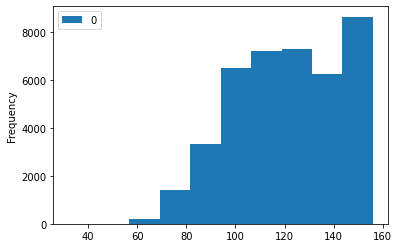

In [11]:
country = 'SE'
measure = 'cases'
pmeasure = 'pcases'

df_pred = pd.DataFrame({'x':df_geo['daynum'], 'y':df_geo[measure][country]})
df_pred = df_pred[df_pred['y'] > 0]
ft_data = np.array(df_pred.astype(int))
xp_data = np.repeat(ft_data[:, 0], ft_data[:, 1])
pd.DataFrame(xp_data).plot(kind='hist')

Now we can use statistical fitting to estimate the curve. From various epidemiological papers the gamma function seems to be a good approximation. It is available in the `scipy` package. A Gamma distribution is described by three parameters and we can use `stats` to get the 4 moments of the distribution.

In [12]:
import scipy.stats as stats

alpha, loc, scale = stats.gamma.fit(xp_data)
print(alpha, loc, scale, len(xp_data))

mean, var, skew, kurt = stats.gamma.stats(alpha, loc, scale, 'mvsk')
print(mean, var, skew, kurt)

394.2418565363173 -329.9731888441845 1.1448762321307862 40803
121.3849424153604 516.7491966580205 0.10072763333255402 0.015219084175166174


The `pdf` function takes the results of `fit` and applies them to input data.

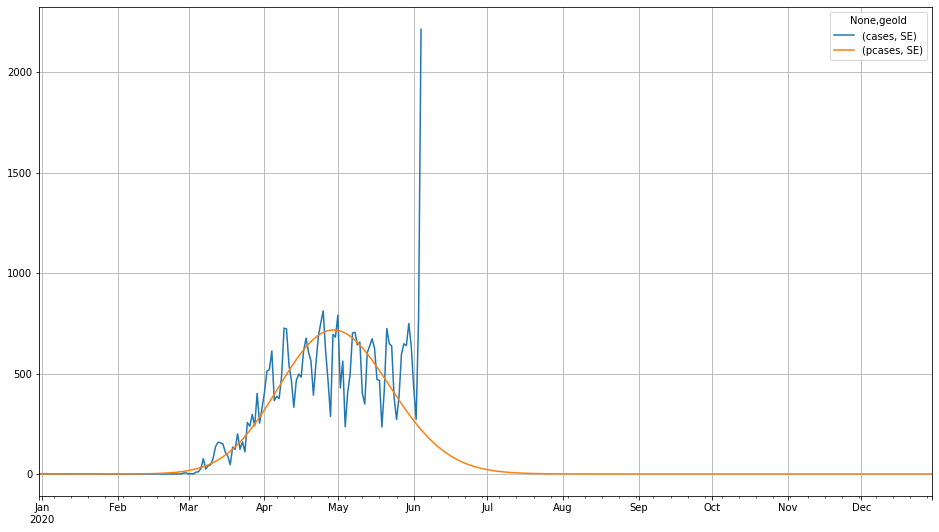

In [13]:
df_geo[(pmeasure, country)] = stats.gamma.pdf(df_geo['daynum'], alpha, loc, scale) * len(xp_data)
df_geo[[(measure, country), (pmeasure, country)]].plot(figsize=(16, 9), grid=True)

Now that we have a curve fitted, we can see where the cumulative number will end up if none of our assumptions change, which is rarely the case.

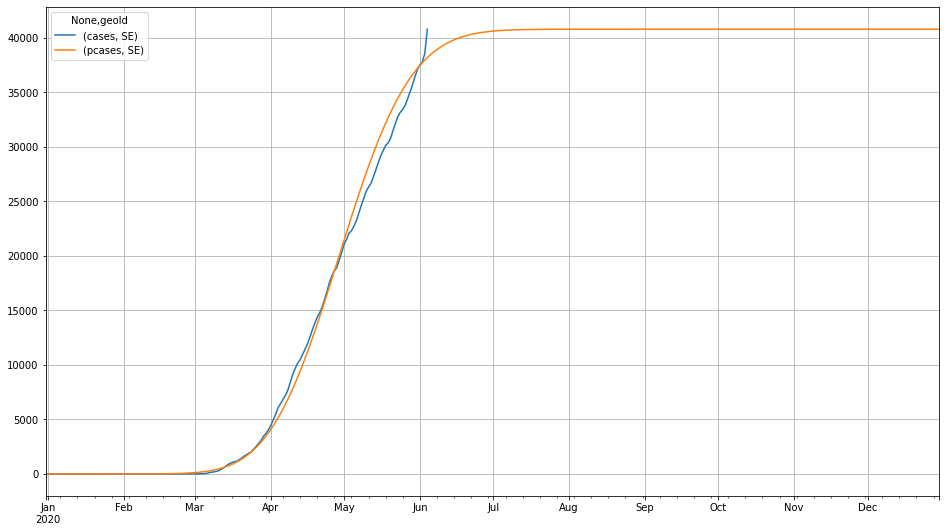

In [14]:
df_geo[[(measure, country), (pmeasure, country)]].cumsum().plot(figsize=(16, 9), grid=True)

Keep exploring! Stay home, wash your hands, keep your distance.